In [24]:
#load the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [26]:
# load the dataset
movies=pd.read_csv('./movies.csv')
ratings=pd.read_csv('./ratings.csv')
# data source : https://www.kaggle.com/ayushimishra2809/movie-recommendation-system/data

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
movieId    10329 non-null int64
title      10329 non-null object
genres     10329 non-null object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [28]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
userId       105339 non-null int64
movieId      105339 non-null int64
rating       105339 non-null float64
timestamp    105339 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [29]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [30]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
5,1,110,4.0,1217896150
6,1,150,3.0,1217895940
7,1,161,4.0,1217897864
8,1,165,3.0,1217897135
9,1,204,0.5,1217895786


In [33]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [34]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [32]:
print(" shape of the movie : ",movies.shape)
print(" shape of the ratings : ",ratings.shape)

 shape of the movie :  (10329, 3)
 shape of the ratings :  (105339, 4)


In [39]:
# find out unique movie genres
All_genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in All_genres:
            All_genres.append(str(i))
All_genres=str(All_genres)    
All_genres

"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']"

In [40]:
# find out total unique movies 
All_movie_title=[]
for title in movies.title:
    All_movie_title.append(title[0:-7])
All_movie_title=str(All_movie_title) 
All_movie_title

'[\'Toy Story\', \'Jumanji\', \'Grumpier Old Men\', \'Waiting to Exhale\', \'Father of the Bride Part II\', \'Heat\', \'Sabrina\', \'Tom and Huck\', \'Sudden Death\', \'GoldenEye\', \'American President, The\', \'Dracula: Dead and Loving It\', \'Balto\', \'Nixon\', \'Cutthroat Island\', \'Casino\', \'Sense and Sensibility\', \'Four Rooms\', \'Ace Ventura: When Nature Calls\', \'Money Train\', \'Get Shorty\', \'Copycat\', \'Assassins\', \'Powder\', \'Leaving Las Vegas\', \'Othello\', \'Now and Then\', \'Persuasion\', \'City of Lost Children, The (Cité des enfants perdus, La)\', \'Shanghai Triad (Yao a yao yao dao waipo qiao)\', \'Dangerous Minds\', \'Twelve Monkeys (a.k.a. 12 Monkeys)\', \'Wings of Courage\', \'Babe\', \'Carrington\', \'Dead Man Walking\', \'Clueless\', \'Cry, the Beloved Country\', \'Richard III\', \'Dead Presidents\', \'Restoration\', \'Mortal Kombat\', \'To Die For\', \'How to Make an American Quilt\', \'Seven (a.k.a. Se7en)\', \'Pocahontas\', \'When Night Is Falling

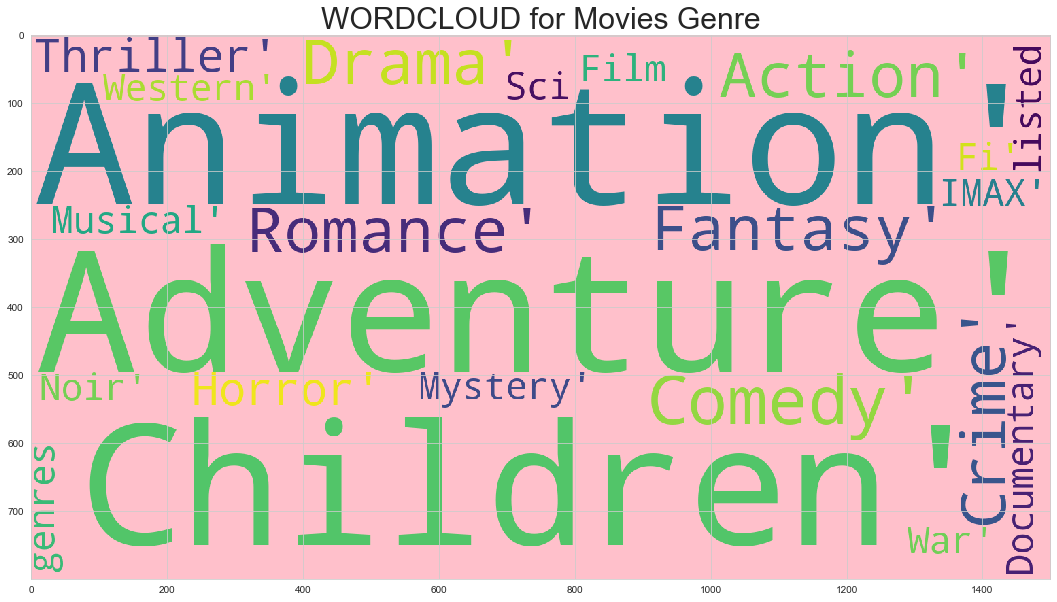

In [46]:
#display word cloud for a genres
wordcloud_genre=WordCloud(width=1500,height=800,background_color='pink',min_font_size=2,min_word_length=3).generate(All_genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2,min_word_length=3).generate(All_movie_title)
plt.figure(figsize=(30,10))
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

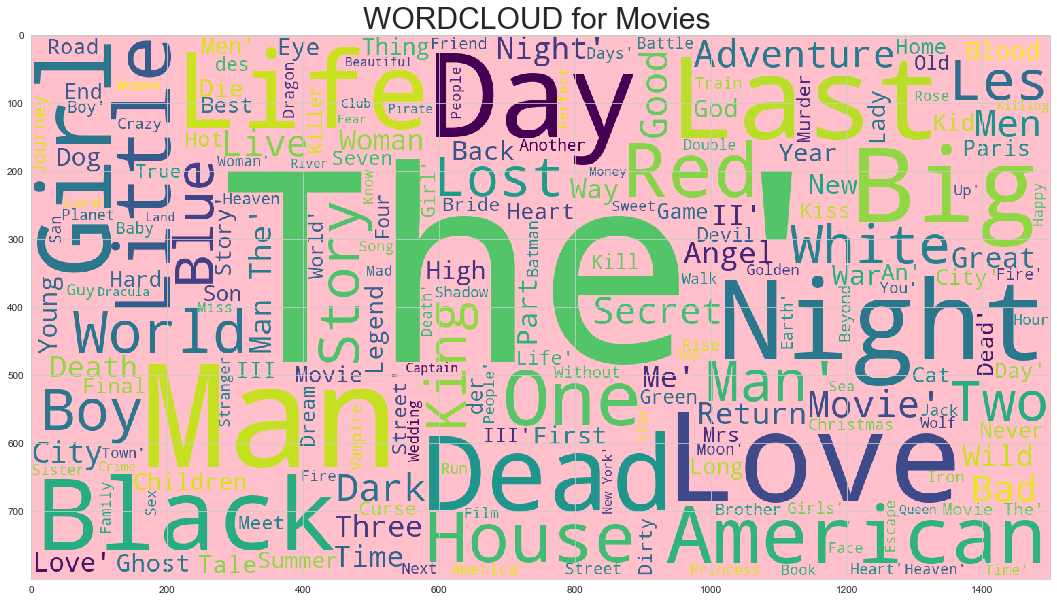

In [48]:
# display word cloud for a movie
wordcloud_movie=WordCloud(width=1500,height=800,background_color='pink',min_font_size=2,min_word_length=3).generate(All_movie_title)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2,min_word_length=3).generate(All_movie_title)
plt.figure(figsize=(30,10))
plt.title('WORDCLOUD for Movies ',fontsize=30)
plt.imshow(wordcloud_movie)

In [49]:
# merge a ratings dataframe with the movie dataframe as per user id
final_df=pd.merge(ratings,movies, how='left',on='movieId')
final_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


<BarContainer object of 20 artists>

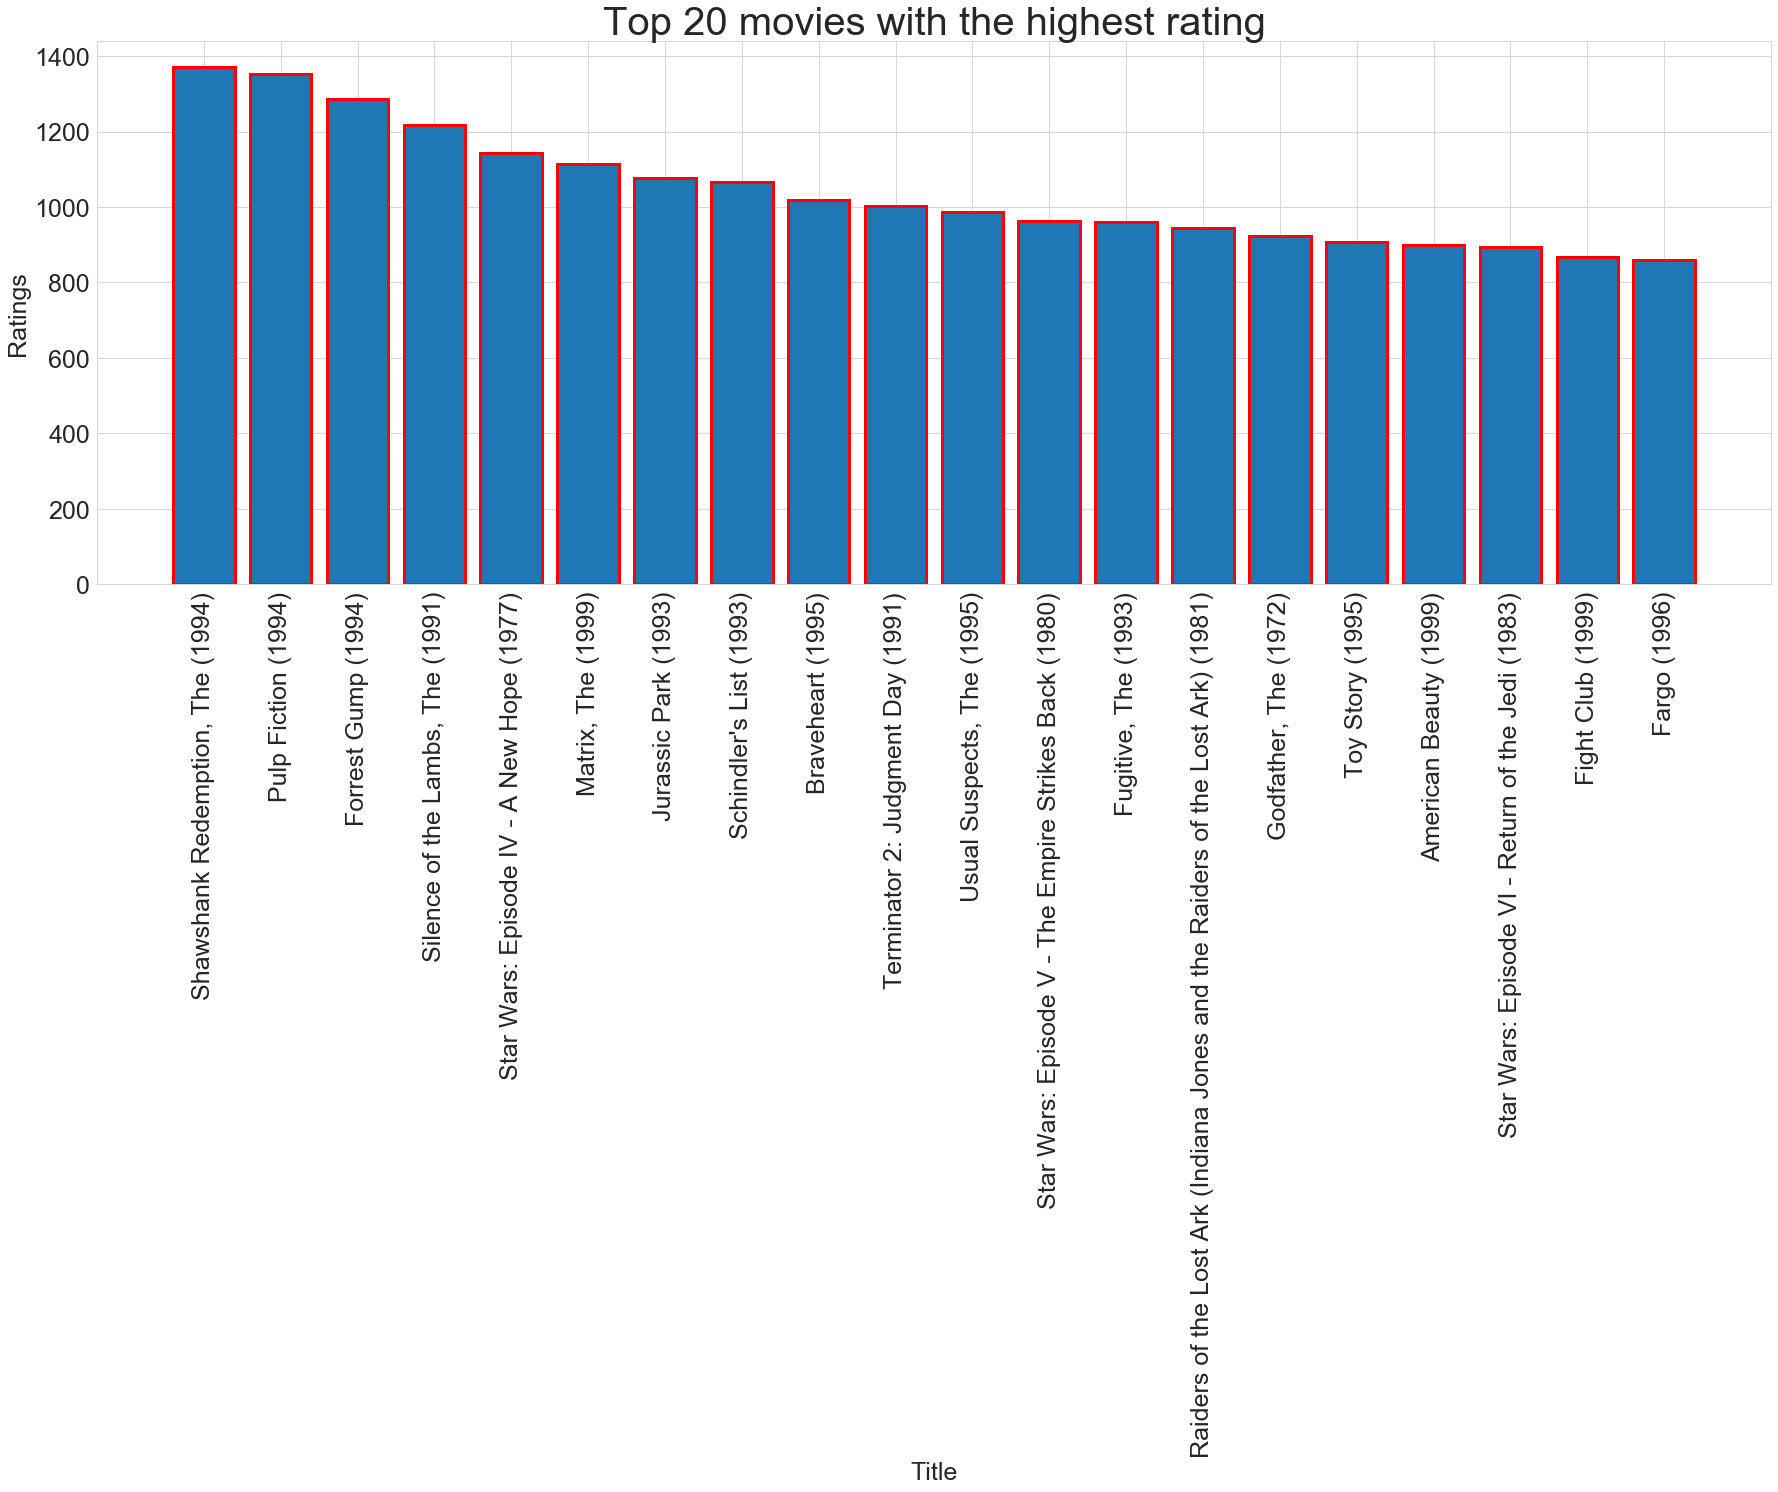

In [53]:
# print top 20 movies with the highest ratings
df1=final_df.groupby(['title'])[['rating']].sum()
highest_rated=df1.nlargest(20,'rating')
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with the highest rating',fontsize=40)
plt.ylabel('Ratings',fontsize=25)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('Title',fontsize=25)
plt.yticks(fontsize=25)
plt.bar(highest_rated.index,high_rated['rating'],linewidth=3,edgecolor='red')

In [54]:
# Finding Similarities Between Movies we are going to implement content based recommendation system.
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [58]:
#To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie
#title and each row contains the rating assigned by a specific userID to that movie.
movie_user = final_df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By calculating the cosine similarity between a movie with other movies, we may make a recommendation to the user. As a result, we must first determine the cosine similarity between the two.

Less cosine score means that movie is much similar to other given movie

In [72]:
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)# find out cosine distance/similarity between all the movies

In [73]:
# make a recommendation for a movie
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def make_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]# find top 10 the most similar items
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [74]:
make_recommendations('Pulp Fiction (1994)') # print first top 10 the most similar movies

537                                          Fargo (1996)
841                                        Freeway (1996)
2606    Man Bites Dog (C'est arrivé près de chez vous)...
4495               Confessions of a Dangerous Mind (2002)
4771                                Hard Word, The (2002)
6897                                    Cul-de-sac (1966)
7620                                     In Bruges (2008)
7972                                     Nobel Son (2007)
8233                               Informant!, The (2009)
8474                               Leaves of Grass (2009)
Name: title, dtype: object